# Import scripts

In [1]:
%run ../scripts/Requirements.ipynb
%run ../scripts/Inventory_Importer.ipynb
%run ../scripts/Figure_Styles.ipynb
%run ../scripts/Country_ISO_Codes.ipynb
%run ../scripts/Figure_Saver.ipynb

repo & folder name: Greenhouse-Data
Requirements imported!
Inventories imported!
current figure and save dpi = 160; current single fig size = (8, 4)
styles imported!
Imported COUNTRY_DICT & CODE_GENERATOR_ISO3
fig_country_saver imported!


In [2]:
# show_figure_style()

In [3]:
# dict for figure generator
STANDARD_COUNTRY_DICT = json.load(open("../supplemental/STANDARD_COUNTRY_DICT_ISO3.json", "r"))
COUNTRY_DICT = json.load(open("../supplemental/STANDARD_COUNTRY_DICT_ISO3.json", "r"))

# MIXED INVENTORIES

CO2 Totals by Country

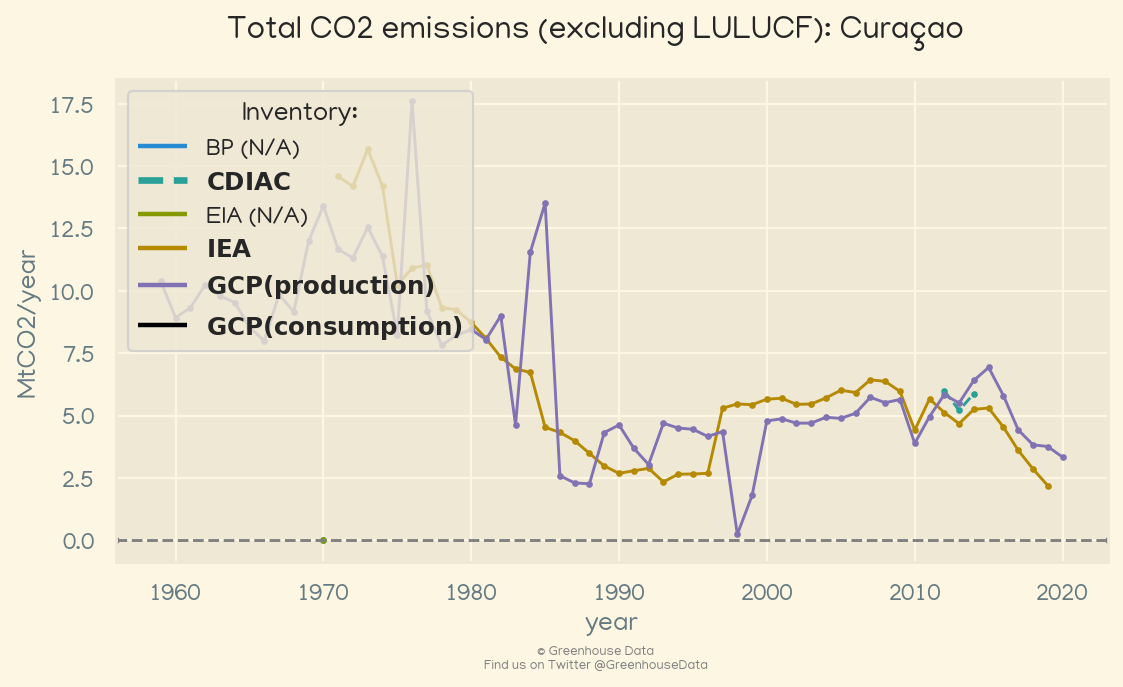

In [4]:
# TOTALS OF CO2 BY COUNTRY
#------------------------------------------------------------------------------------

def plot_CO2_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle(f"Total CO2 emissions (excluding LULUCF): {STANDARD_COUNTRY_DICT[code]}")
    
    #BP
    try:
        df_bp_tot = df_bp[df_bp.code == code].reset_index().loc[0,"1965":].astype(float)
        df_bp_tot.index = pd.to_datetime(df_bp_tot.index, format="%Y")
        # display(df_bp_tot)
        axs.plot(df_bp_tot, label=r"$\bf{" + "BP" + "}$")
    except:
        axs.plot([0],[0], label="BP (N/A)")

    #CDIAC
    try:
        df_cdiac_tot = df_cdiac.loc[df_cdiac.code==code, :].set_index("Year")["Total CO2 emissions from fossil-fuels and cement production (MtCO2)"]
        df_cdiac_tot.index = pd.to_datetime(df_cdiac_tot.index, format="%Y")
        if len(df_cdiac_tot)>1:
            axs.plot(df_cdiac_tot, label=r"$\bf{" + "CDIAC" + "}$", ls="--", lw=3)
        else: fail_this_shit
    except:
        axs.plot([0],[0], label="CDIAC (N/A)")
    
    #EIA
    try:
        df_eia_tot = df_eia[(df_eia.code==code) & (df_eia.fuel=='Total CO2 emissions')].set_index("fuel").loc[:, "1949":].iloc[0,:]
        df_eia_tot.index = pd.to_datetime(df_eia_tot.index, format="%Y")
        axs.plot(df_eia_tot, label=r"$\bf{" + "EIA" + "}$")    
    except:
        axs.plot([0],[0], label="EIA (N/A)")
    
    #IEA
    try:
        df_iea_tot = df_iea[(df_iea.code==code)].set_index("type").loc["total_fuel_combustion", "1971":]
        df_iea_tot.index = pd.to_datetime(df_iea_tot.index, format="%Y")
        axs.plot(df_iea_tot, label=r"$\bf{" + "IEA" + "}$")   
    except:
        axs.plot([0],[0], label="IEA (N/A)")
    
    #GCP
    try:
        df_gcp_tot = df_gcp[(df_gcp.code==code)].loc[:, "1959":].iloc[0,:]
        df_gcp_tot.index = pd.to_datetime(df_gcp_tot.index, format="%Y")
        axs.plot(df_gcp_tot, label=r"$\bf{" + "GCP (production)" + "}$", color="m")       
    except:
        axs.plot([0],[0], label="GCP prod (N/A)")
    
    #GCP-cons
    try:
        df_gcp_cons_tot = df_gcp_cons[(df_gcp_cons.code==code)].loc[:, "1959":].iloc[0,:]
        df_gcp_cons_tot.index = pd.to_datetime(df_gcp_cons_tot.index, format="%Y")
        axs.plot(df_gcp_cons_tot, label=r"$\bf{" + "GCP (consumption)" + "}$", color="black")       
    except:
        axs.plot([0],[0], label="GCP cons (N/A)")
    
    axs.axhline(0, color="grey", ls="--", lw=1)
    
    axs.set_xlabel("year")
    axs.set_ylabel("MtCO2/year")
    axs.legend(loc="upper left", title="Inventory:")
    
    for i,j in enumerate(axs.lines):
        axs.lines[i].set_marker("o")
        axs.lines[i].set_markersize(2)
        axs.lines[i].set_linewidth(1.3)
        # axs.lines[i].set_linestyle(":")
    
    add_GreenhouseData_trademark(fig, y=-.04)
    
    fig_country_saver(fig, code, "CO2_totals")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_CO2_totals(random.choice(list(STANDARD_COUNTRY_DICT.keys())))

In [5]:
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES

list_codes = list(STANDARD_COUNTRY_DICT.keys()) #UPDATE HERE

for i in range(len(list_codes)):
    code = list_codes[i]
    print(code, end="\r")
    try:
        plot_CO2_totals(code, close=True) #UPDATE HERE
    except:
        display(f"{code} nop")
        plt.close()
        
%run UPDATE.ipynb

pages updated
Global & country READMES updated
Homepage updated


# BP

In [6]:
df_bp

,code,name,unit,1965,1966,1967,1968,1969,1970,1971,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,CAN,Canada,MtCO2,260.328494,271.695135,285.543065,308.282174,320.455802,344.911566,351.587904,...,554.684502,551.136751,564.581949,571.809431,570.155125,553.250422,565.912760,576.210989,577.997163,517.656723
1,MEX,Mexico,MtCO2,62.133329,65.055673,66.647498,72.170911,79.106716,84.172180,89.461650,...,472.973143,476.710063,483.185138,471.180127,475.225283,480.443636,486.075949,477.118539,459.758515,373.215914
2,USA,US,MtCO2,3451.891855,3639.795004,3738.161319,3947.343459,4117.396247,4271.528132,4309.068601,...,5348.439351,5101.537959,5268.307567,5277.560073,5165.570150,5060.806233,5003.178942,5166.031776,5029.389363,4457.219800
3,NaN,Total North America,MtCO2,3774.353678,3976.545812,4090.351882,4327.796544,4516.958764,4700.611877,4750.118155,...,6376.096995,6129.384774,6316.074655,6320.549632,6210.950558,6094.500291,6055.167650,6219.361305,6067.145041,5348.092438
4,ARG,Argentina,MtCO2,82.175120,84.526808,86.852525,89.324243,92.183564,85.895493,90.804629,...,174.763500,183.748817,189.430178,189.544434,192.767155,191.450785,189.685376,187.460685,175.817913,164.133062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,NaN,Total Asia Pacific,MtCO2,1431.313107,1549.491516,1615.940543,1721.616694,1958.204612,2234.981320,2445.576141,...,14869.453290,15309.823063,15666.971249,15850.095276,15988.325151,16148.466989,16501.051245,16917.645565,17203.330308,16812.478080
98,NaN,Total World,MtCO2,11189.710673,11694.894484,12055.547104,12701.480490,13483.695285,14291.709386,14762.395588,...,32172.508226,32503.997053,33071.152064,33140.667330,33206.145249,33361.880092,33726.868179,34351.098958,34356.611795,32318.644854
99,NaN,of which: OECD,MtCO2,7701.282862,8003.175822,8270.866419,8782.764892,9306.691008,9791.451164,9934.096882,...,12857.597343,12667.868636,12767.240569,12553.922901,12473.073827,12377.713337,12396.274549,12494.836120,12140.099652,10778.102600
100,NaN,Non-OECD,MtCO2,3488.427811,3691.718662,3784.680685,3918.715598,4177.004277,4500.258222,4828.298706,...,19314.910883,19836.128418,20303.911495,20586.744430,20733.071422,20984.166754,21330.593631,21856.262837,22216.512143,21540.542254


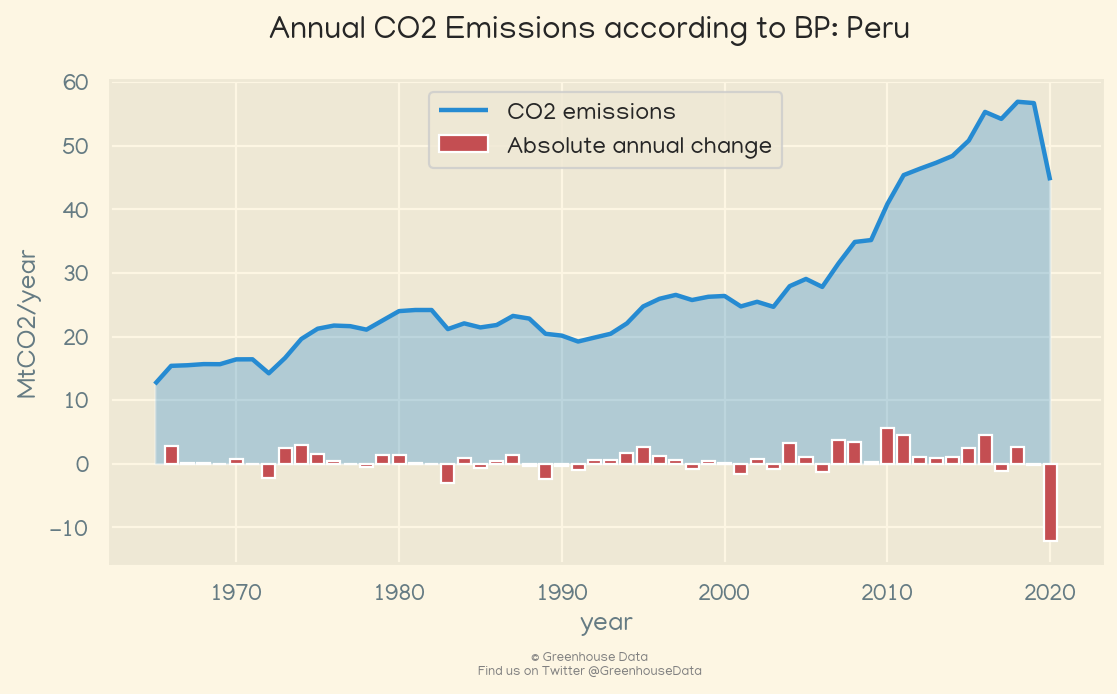

In [7]:
df_bp = df_bp[df_bp.code.notna()].reset_index().drop("index", axis=1)

#------------------------------------------------------------------------------------

def plot_bp_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle("Annual CO2 Emissions according to BP: {}".format(STANDARD_COUNTRY_DICT[code]))
    
    x = df_bp.loc[:,"1965":].columns.astype(float)
    y = df_bp[df_bp.code == code].reset_index().loc[0,"1965":].astype(float)
    axs.plot(x,y, label="CO2 emissions")
    axs.fill_between(x,y, alpha=.3)
    
    x2 = df_bp.loc[:,"1965":].diff(axis=1).columns.astype(float)
    y2 = df_bp[df_bp.code == code].reset_index().loc[0,"1965":].diff().astype(float)
    axs.bar(x2,y2, label="Absolute annual change", color="r")
    
    axs.set_ylabel("MtCO2/year")
    axs.set_xlabel("year")

    axs.legend()
    
    fig_country_saver(fig, code, "BP_1")
    
    add_GreenhouseData_trademark(fig, y=-.05)
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_bp_totals(random.choice(df_bp.code))

In [8]:
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_bp.code.unique() #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_bp_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

Finished
pages updated
Global & country READMES updated
Homepage updated


# CDIAC

In [9]:
df_cdiac

,code,name,Year,unit,Total CO2 emissions from fossil-fuels and cement production (MtCO2),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (tCO2),Emissions from bunker fuels (not included in the totals)
0,AFG,AFGHANISTAN,1949,MtCO2,0.014667,0.014667,0.000000,0.0,0.000000,NaN,NaN,0.000000
1,AFG,AFGHANISTAN,1950,MtCO2,0.084333,0.022000,0.066000,0.0,0.000000,0.0,0.000000,0.000000
2,AFG,AFGHANISTAN,1951,MtCO2,0.091667,0.025667,0.066000,0.0,0.000000,0.0,0.000000,0.000000
3,AFG,AFGHANISTAN,1952,MtCO2,0.091667,0.033000,0.062333,0.0,0.000000,0.0,0.000000,0.000000
4,AFG,AFGHANISTAN,1953,MtCO2,0.106333,0.036667,0.066000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17227,ZWE,ZIMBABWE,2010,MtCO2,7.777000,5.613667,1.763667,0.0,0.399667,0.0,0.000550,0.025667
17228,ZWE,ZIMBABWE,2011,MtCO2,9.562667,5.808000,3.256000,0.0,0.498667,0.0,0.000660,0.029333
17229,ZWE,ZIMBABWE,2012,MtCO2,7.791667,3.362333,3.688667,0.0,0.737000,0.0,0.000550,0.033000
17230,ZWE,ZIMBABWE,2013,MtCO2,11.674667,6.974000,4.103000,0.0,0.594000,0.0,0.000770,0.033000


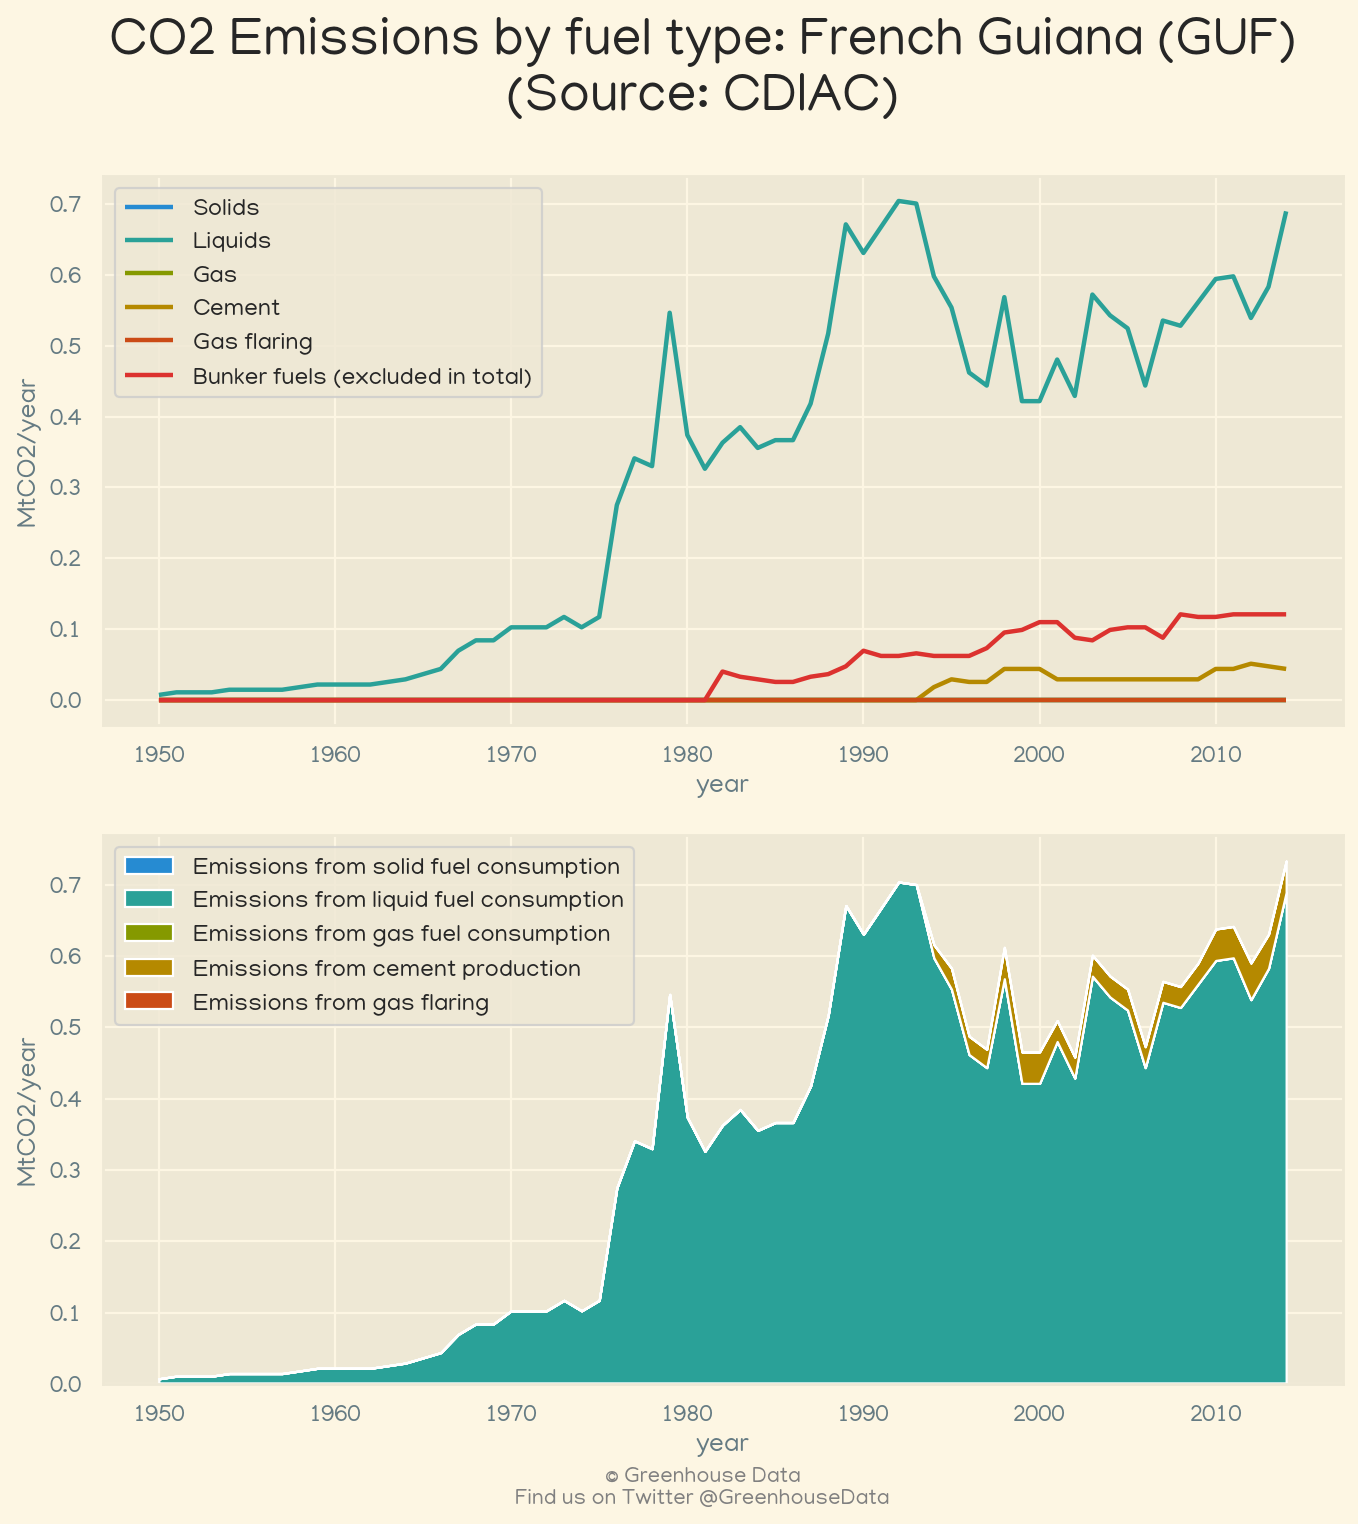

In [10]:
df_cdiac = df_cdiac[df_cdiac.code.notna()].reset_index().drop("index", axis=1)

#----------------------------------------------------------------------------------

def plot_cdiac_totals(code, close=False):
    fig, axs = plt.subplots(2,1, figsize = (10,10))
    axs=axs.flatten()
    fig.suptitle("CO2 Emissions by fuel type: {} ({})\n(Source: CDIAC)".format(STANDARD_COUNTRY_DICT[code], code),
                 fontsize=24)

    code = code
    x = df_cdiac[df_cdiac.code==code].Year
    # y1 = df_cdiac[df_cdiac.code==code]["Total CO2 emissions from fossil-fuels and cement production (MtCO2)"]
    y2 = df_cdiac[df_cdiac.code==code]["Emissions from solid fuel consumption"]
    y3 = df_cdiac[df_cdiac.code==code]["Emissions from liquid fuel consumption"]
    y4 = df_cdiac[df_cdiac.code==code]["Emissions from gas fuel consumption"]
    y5 = df_cdiac[df_cdiac.code==code]["Emissions from cement production"]
    y6 = df_cdiac[df_cdiac.code==code]["Emissions from gas flaring"]
    y7 = df_cdiac[df_cdiac.code==code]["Emissions from bunker fuels (not included in the totals)"]

    # axs[0].plot(x,y1, label="Total")
    axs[0].plot(x,y2, label="Solids", )
    axs[0].plot(x,y3, label="Liquids")
    axs[0].plot(x,y4, label="Gas")
    axs[0].plot(x,y5, label="Cement")
    axs[0].plot(x,y6, label="Gas flaring")
    axs[0].plot(x,y7, label="Bunker fuels (excluded in total)")
    
    axs[0].set_ylabel("MtCO2/year")
    axs[0].set_xlabel("year")
    axs[0].legend(loc="upper left")
    
    
    #BELOW
    df = df_cdiac[df_cdiac.code==code].set_index("Year").loc[:,"Emissions from solid fuel consumption":"Emissions from gas flaring"]
    df_cdiac_pos = df[df >= 0].fillna(0) #only positive values
    df_cdiac_neg = df[df < 0].fillna(0) #only (few) negative values
    axs[1].stackplot(df_cdiac_pos.index, df_cdiac_pos["Emissions from solid fuel consumption"], df_cdiac_pos["Emissions from liquid fuel consumption"], df_cdiac_pos["Emissions from gas fuel consumption"], df_cdiac_pos["Emissions from cement production"], df_cdiac_pos["Emissions from gas flaring"])
    axs[1].stackplot(df_cdiac_neg.index, df_cdiac_neg["Emissions from solid fuel consumption"], df_cdiac_neg["Emissions from liquid fuel consumption"], df_cdiac_neg["Emissions from gas fuel consumption"], df_cdiac_neg["Emissions from cement production"], df_cdiac_neg["Emissions from gas flaring"])

    axs[1].set_ylabel("MtCO2/year")
    axs[1].set_xlabel("year")    
    axs[1].legend(df.columns, loc="upper left")
    
    add_GreenhouseData_trademark(fig, y=.05, fontsize=10)
    
    fig_country_saver(fig, code, "CDIAC_1")
    if close == True:
        plt.close()


#----------------------------------------------------------------------------------
#Random example
import random
plot_cdiac_totals(random.choice(df_cdiac.code))#are, gbr, che, aut

In [11]:
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_cdiac.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_cdiac_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

Finished
pages updated
Global & country READMES updated
Homepage updated


# EIA

In [12]:
df_eia

,code,name,fuel,unit,1949,1950,1951,1952,1953,1954,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,World,Total CO2 emissions,MtCO2,2206.690829,2382.046176,2526.687327,2473.373964,2536.892888,2422.252560,...,33652.592480,34786.404150,35607.551210,36013.901510,36046.193730,35855.855040,35278.502260,36072.334790,36903.369940,NaN
1,NaN,World,Coal and coke,MtCO2,1117.538985,1151.600346,1166.858975,1052.386511,1057.069608,904.191799,...,15035.601790,15850.888010,16325.705770,16505.522040,16392.746650,15844.416120,14956.562250,15365.386070,15783.059180,15953.296480
2,NaN,World,Consumed natural gas,MtCO2,269.537229,312.826758,369.725933,396.144693,414.852766,437.259069,...,6323.923968,6512.988366,6662.056920,6760.094300,6785.637172,6887.367588,7027.731893,7259.328867,7626.683356,NaN
3,NaN,World,Petroleum and other liquids,MtCO2,819.614615,917.619072,990.102419,1024.842760,1064.970514,1080.801692,...,12293.066720,12422.527770,12619.788520,12748.285170,12867.809900,13124.071330,13294.208110,13447.619860,13493.627400,NaN
4,AFG,Afghanistan,Total CO2 emissions,MtCO2,NaN,NaN,NaN,NaN,NaN,NaN,...,7.794436,11.097939,9.753423,7.910700,7.169380,7.852509,7.279396,7.886124,8.274967,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,ZMB,Zambia,Petroleum and other liquids,MtCO2,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.283313,2.694185,2.829693,3.248111,3.551921,3.418348,3.795672,4.249168,NaN
920,ZWE,Zimbabwe,Total CO2 emissions,MtCO2,NaN,NaN,NaN,NaN,NaN,NaN,...,8.522609,9.921276,10.923624,11.587550,11.298057,11.820449,10.417494,9.227403,8.935401,NaN
921,ZWE,Zimbabwe,Coal and coke,MtCO2,NaN,NaN,NaN,NaN,NaN,NaN,...,6.622609,6.485795,7.152900,7.254805,7.364456,7.730051,6.880535,5.712488,4.588967,4.027143
922,ZWE,Zimbabwe,Consumed natural gas,MtCO2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


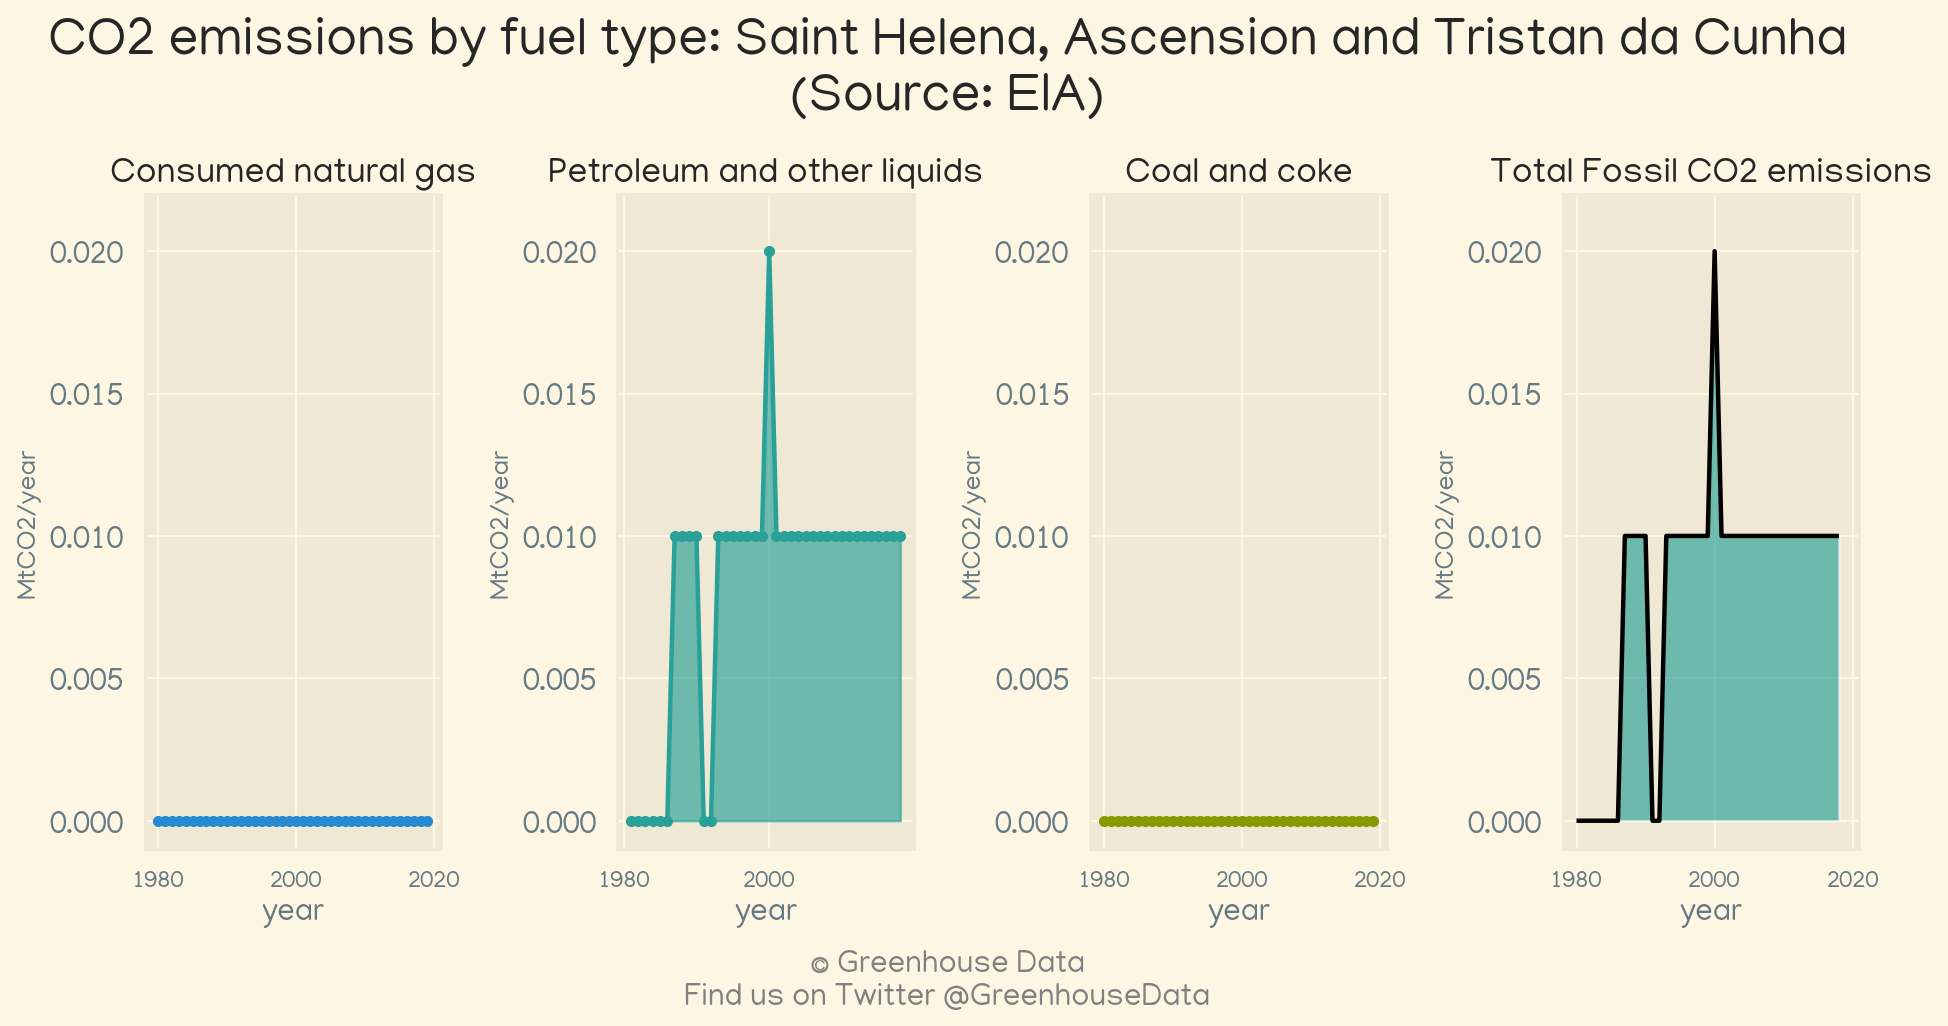

In [13]:
df_eia = df_eia[df_eia.code.notna()].reset_index().drop("index", axis=1)

#------------------------------------------------------------------------------------

def plot_eia_subplots_fuel(code, close=False):
    

    fig, axs = plt.subplots(1,4, figsize = (12,6), sharey=False)
    axs = axs.flatten()
    fig.suptitle(f"CO2 emissions by fuel type: {STANDARD_COUNTRY_DICT[code]}\n(Source: EIA)",
                 fontsize=24)

    df = df_eia[df_eia.code==code]
    df = df.set_index("fuel")
    df = df.loc[:,"1949":].T
    df.index = pd.to_datetime(df.index, format="%Y").year
    df = df[["Consumed natural gas", "Petroleum and other liquids", "Coal and coke", "Total CO2 emissions"]]
    df = df.astype(float).round(2)
    
    for i, j in enumerate(df.columns[:-1]):
        axs[i].set_title(j)
        axs[i].plot(df[j], marker="o", markersize=4,
                   color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        axs[i].fill_between(df.index, df[j],0,
                    color= plt.rcParams['axes.prop_cycle'].by_key()['color'][i], alpha=.66)


    axs[3].set_title("Total Fossil CO2 emissions")
    axs[3].plot(df[df.columns[-1]], color="black")
    axs[3].stackplot(df.index, df[df.columns[0]], df[df.columns[1]], df[df.columns[2]],
                    colors=[axs[0].lines[0].get_color(), axs[1].lines[0].get_color(), axs[2].lines[0].get_color()],
                    alpha=.66)

    for i, j in enumerate(df.columns):
        axs[i].set_xlabel("year", fontsize=14)        
        axs[i].set_ylabel("MtCO2/year")
        axs[i].set_ylim(-0.001, df.max().max()*1.1)
        ax = axs[i]
        ax.tick_params("y", labelsize=14)
        
    fig.tight_layout()
    
    add_GreenhouseData_trademark(fig, y=-.05, fontsize=14)

    fig_country_saver(fig, code, "EIA_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_eia_subplots_fuel(random.choice(df_eia.code))

In [14]:
# list_eia = df_eia.groupby("code").count().index
# for i in range(len(list_eia)):
#     code = list_eia[i]
#     print(code, end="\r")
#     try:
#         plot_eia_subplots_fuel(code, close=True)
#     except:
#         display(f"{code} nop")
#         plt.close()
        
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_eia.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_eia_subplots_fuel(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

Finished
pages updated
Global & country READMES updated
Homepage updated


# IEA

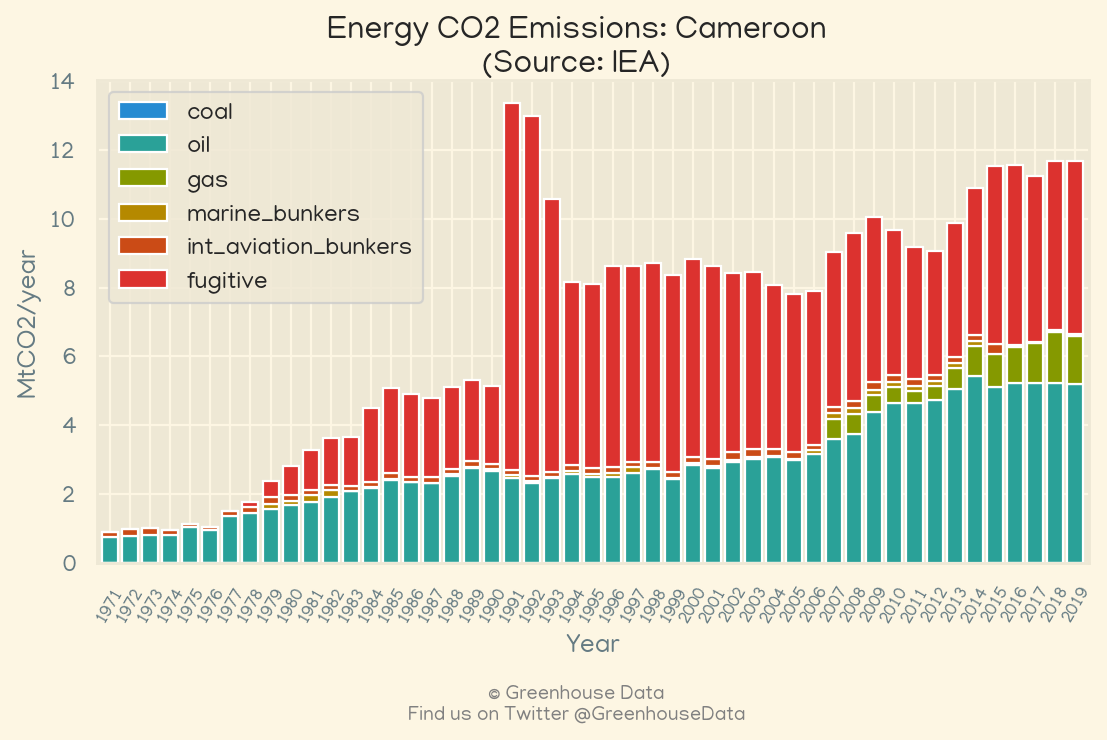

In [15]:
df_iea = df_iea[df_iea.code.notna()].reset_index().drop("index", axis=1)

#------------------------------------------------------------------------------------

def plot_iea_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle("Energy CO2 Emissions: {}\n(Source: IEA)".format(STANDARD_COUNTRY_DICT[code]))
    
    df = df_iea[df_iea.code==code].set_index("type").drop(["code","name","unit"], axis=1)
    df = df.T
    df.index = pd.to_datetime(df.index).year    
    df = df.loc[:2019,"coal":]
    
    df.plot(kind="bar", stacked=True, ax=axs, width=.8, use_index=True)
    axs.tick_params("x", rotation=60, labelsize=8)
    axs.set_ylabel("MtCO2/year")
    axs.set_xlabel("Year")

    # display(df.loc[:2019,:].total_fuel_combustion)
    # axs.annotate(text = "hi", fontsize=30,
    #              xy=(df.loc[:2019,:].index[-5] , 
    #                  df.loc[:2019,:].total_fuel_combustion[2019] ))
    
    axs.legend()

    add_GreenhouseData_trademark(fig, y=-.12, fontsize=9)

    fig_country_saver(fig, code, "IEA_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_iea_totals(random.choice(df_iea.code))

In [16]:
# list_iea = df_iea.groupby("code").count().index
# for i in range(len(list_iea)):
#     code = list_iea[i]
#     print(code, end="\r")
#     try:
#         plot_iea_totals(code, close=True)
#     except:
#         display(f"{code} nop")
#         plt.close()
        
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_iea.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_iea_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

Finished
pages updated
Global & country READMES updated
Homepage updated


# GCP (Prod and cons)

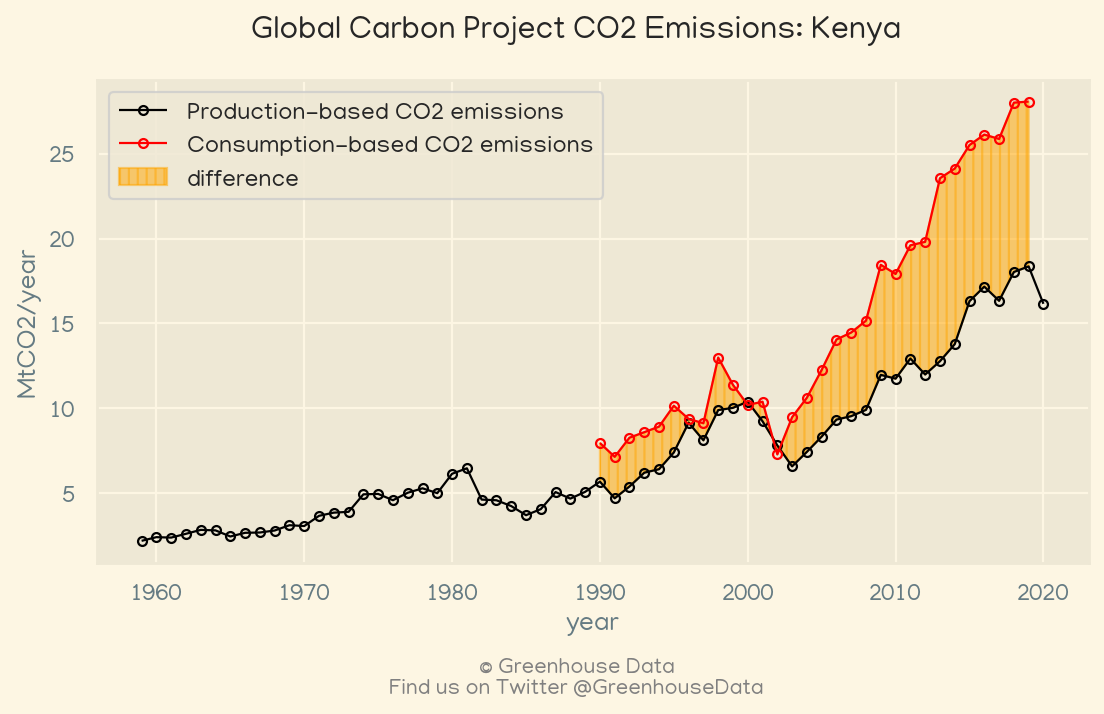

In [17]:
df_gcp = df_gcp[df_gcp.code.notna()].reset_index().drop("index", axis=1)

#------------------------------------------------------------------------------------

def plot_gcp_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle("Global Carbon Project CO2 Emissions: {}".format(STANDARD_COUNTRY_DICT[code]))
    
    x = df_gcp.columns[3:]
    x = pd.to_datetime(x)
    y = df_gcp[df_gcp.code == code].reset_index().loc[0,"1959":].astype(float)
    axs.plot(x,y, label="Production-based CO2 emissions", color="black",
             marker="o", markerfacecolor="none", markersize=4, lw=1)
    
    x2 = df_gcp_cons.columns[3:]
    x2 = pd.to_datetime(x2)
    y2 = df_gcp_cons[df_gcp_cons.code == code].reset_index().loc[0,"1959":].astype(float)
    
    if y2.sum()!=0:
        # if both exist!
        axs.plot(x2,y2, label="Consumption-based CO2 emissions", color = "red",
                 marker="o", markerfacecolor="none", markersize=4, lw=1)
        axs.fill_between(x,y,y2, alpha=.5, color="orange", hatch="|||", label="difference")
    else: 
        #only production is available available
        axs.bar(x,y)
        axs.fill_between(x,y, alpha=.3)
        fig.text(s = "*Only Production (territorial)-based emissions are available", 
                     x=.5, y=.9,ha="center", fontsize=6)

    axs.set_ylabel("MtCO2/year")
    axs.set_xlabel("year")

    axs.legend()
    
    add_GreenhouseData_trademark(fig, y=-.08, fontsize=10)
    
    fig_country_saver(fig, code, "GCP_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_gcp_totals(random.choice(df_gcp.code))

In [18]:
# list_gcp = df_gcp.groupby("code").count().index
# for i in range(len(list_gcp)):
#     code = list_gcp[i]
#     print(code, end="\r")
#     try:
#         plot_gcp_totals(code, close=True)
#     except:
#         display(f"{code} nop")
#         plt.close()
        
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_gcp.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_gcp_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

Finished
pages updated
Global & country READMES updated
Homepage updated


# CAIT

In [19]:
df_cait

,code,name,Source,Sector,Gas,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AFG,Afghanistan,CAIT,Total excluding LUCF,All GHG,15.182846,15.102011,13.634687,13.463994,13.271733,...,36.955463,44.906165,58.651861,66.749281,74.796108,84.619232,93.728621,95.372841,97.300113,98.920758
1,AFG,Afghanistan,CAIT,Total including LUCF,All GHG,12.794043,12.713208,11.245884,11.075191,10.882930,...,37.077364,45.028066,58.405642,66.503062,74.549889,84.373013,93.482402,95.527498,97.454770,99.075415
2,AFG,Afghanistan,CAIT,Energy,All GHG,5.829497,5.334624,3.760858,3.422760,3.102594,...,20.140819,26.056618,39.529423,47.592229,55.527034,64.675839,74.741644,75.932911,77.718177,79.580444
3,AFG,Afghanistan,CAIT,Industrial Processes,All GHG,0.051879,0.054500,0.060111,0.062722,0.065343,...,0.222971,0.248895,0.313896,0.378967,0.449909,0.534630,0.592081,0.758807,0.911544,1.064280
4,AFG,Afghanistan,CAIT,Agriculture,All GHG,8.072853,8.396465,8.409491,8.486480,8.523959,...,13.857023,15.788381,15.902260,15.777792,15.724861,16.220447,15.112568,15.315738,15.221951,14.744536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9077,ZWE,Zimbabwe,CAIT,Other Fuel Combustion,N2O,0.407812,0.417100,0.426387,0.435675,0.444962,...,0.876841,0.901256,1.023247,1.145238,1.267229,1.389220,1.511210,1.536870,1.562529,1.588188
9078,ZWE,Zimbabwe,CAIT,Fugitive Emissions,N2O,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9079,ZWE,Zimbabwe,CAIT,Total excluding LUCF,F-Gas,0.067604,0.064739,0.061875,0.059011,0.056146,...,0.300719,0.323994,0.379388,0.434782,0.490176,0.545570,0.600965,0.665562,0.730160,0.794758
9080,ZWE,Zimbabwe,CAIT,Total including LUCF,F-Gas,0.067604,0.064739,0.061875,0.059011,0.056146,...,0.300719,0.323994,0.379388,0.434782,0.490176,0.545570,0.600965,0.665562,0.730160,0.794758


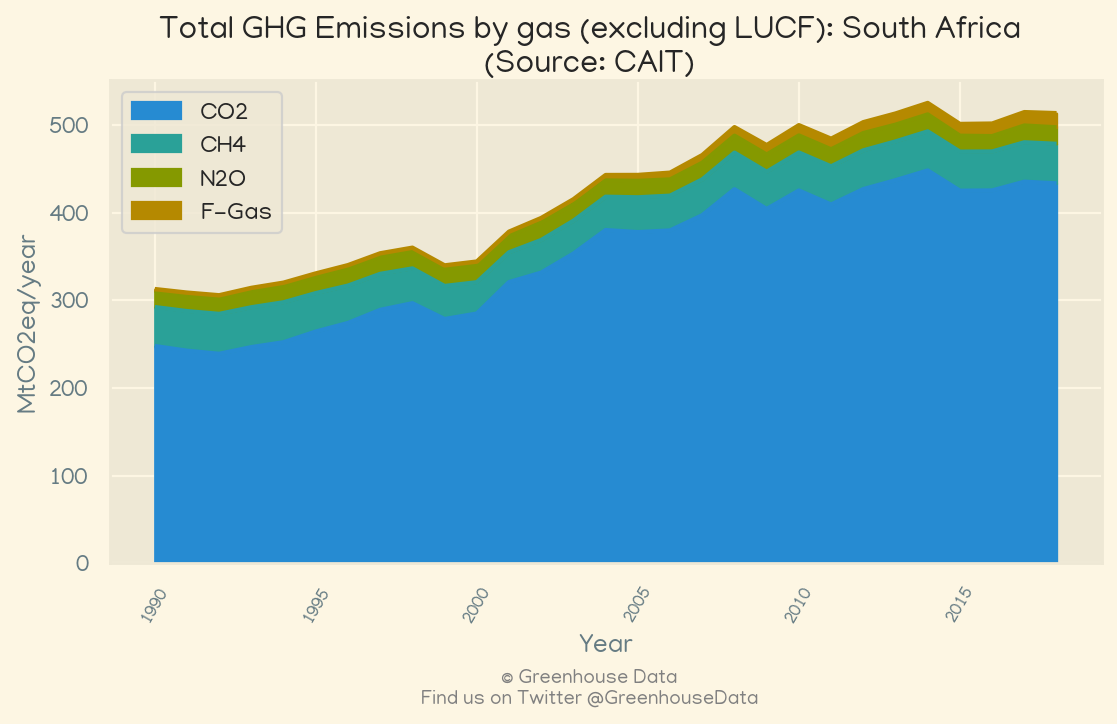

In [20]:
df_cait = df_cait[df_cait.code.notna()].reset_index().drop("index", axis=1)
# display(df_cait)

#------------------------------------------------------------------------------------

def plot_cait_gases(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle("Total GHG Emissions by gas (excluding LUCF): {}\n(Source: CAIT)".format(STANDARD_COUNTRY_DICT[code]))
    
    df = df_cait[df_cait.code==code]
    df = df[df.Sector=="Total excluding LUCF"]
    df = df[df.Gas != "All GHG"]
    df = df.set_index("Gas")
    df = df.loc[:,"1990":]
    df = df.T
    
    df.plot(kind="area", ax=axs)    
    axs.tick_params("x", rotation=60, labelsize=8)
    axs.set_ylabel("MtCO2eq/year")
    axs.set_xlabel("Year")

    
    axs.legend()

    add_GreenhouseData_trademark(fig, y=-.095, fontsize=9)

    fig_country_saver(fig, code, "CAIT_gases_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_cait_gases(random.choice(df_cait.code))

In [21]:
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES

list_codes = df_cait.groupby("code").count().index #UPDATE HERE

for i in range(len(list_codes)):
    code = list_codes[i]
    print(code, end="\r")
    try:
        plot_cait_gases(code, close=True) #UPDATE HERE
    except:
        display(f"{code} nop")
        plt.close()
        
%run UPDATE.ipynb

'EUU nop'

'WORLD nop'

pages updated
Global & country READMES updated
Homepage updated


# EDGAR

In [22]:
df_edgar

,IPCC_annex,C_group_IM24_sh,code,name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,fossil_bio,gas,unit,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Annex_I,Canada,CAN,Canada,1.A.1.a,Main Activity Electricity and Heat Production,fossil,CH4,MtCO2,0.014361,...,0.056088,0.059289,0.061368,0.063295,0.063566,0.066249,0.068991,0.067983,0.063724,0.065608
1,Annex_I,Canada,CAN,Canada,1.A.1.a,Main Activity Electricity and Heat Production,bio,CH4,MtCO2,0.006558,...,0.057891,0.079253,0.076398,0.075442,0.076225,0.096090,0.097266,0.097276,0.053665,0.053665
2,Annex_I,Canada,CAN,Canada,1.A.1.bc,Petroleum Refining - Manufacture of Solid Fuel...,fossil,CH4,MtCO2,0.027933,...,0.105708,0.110430,0.118802,0.127122,0.135416,0.139574,0.143764,0.140550,0.143141,0.146261
3,Annex_I,Canada,CAN,Canada,1.A.2,Manufacturing Industries and Construction,bio,CH4,MtCO2,0.206201,...,0.253163,0.222757,0.215225,0.217589,0.237608,0.225808,0.214071,0.178793,0.238820,0.239049
4,Annex_I,Canada,CAN,Canada,1.A.2,Manufacturing Industries and Construction,fossil,CH4,MtCO2,0.073614,...,0.058573,0.061941,0.066365,0.065297,0.060835,0.059466,0.062843,0.062138,0.065185,0.063980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12759,Int. Shipping,Int. Shipping,SEA,Int. Shipping,1.A.3.d,Water-borne Navigation,bio,N2O,MtCO2,NaN,...,NaN,NaN,NaN,0.000663,0.001081,0.002752,0.004005,0.003823,0.005066,0.005947
12760,Int. Shipping,Int. Shipping,SEA,Int. Shipping,1.A.3.d,Water-borne Navigation,fossil,N2O,MtCO2,2.509692,...,4.372187,4.704583,4.707693,4.372927,4.358940,4.519283,4.698112,4.826626,4.957727,5.003238
12761,Int. Shipping,Int. Shipping,SEA,Int. Shipping,5.A,Indirect N2O emissions from the atmospheric de...,fossil,N2O,MtCO2,10.887422,...,18.963562,20.405027,20.417806,18.968531,18.909712,19.612941,20.394404,20.951241,21.524355,21.721645
12762,Int. Aviation,Int. Aviation,AIR,Int. Aviation,1.A.3.a,Civil Aviation,fossil,N2O,MtCO2,1.289688,...,3.309789,3.493426,3.623089,3.651670,3.713889,3.837986,4.050231,4.226370,4.462111,4.649329


# PRIMAP

In [23]:
df_primap

,source,scenario (PRIMAP-hist),code,name,entity,unit,category (IPCC2006_PRIMAP),1750,1751,1752,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,PRIMAP-hist_v2.3.1,HISTCR,ABW,Aruba,CH4,Gg CH4 / yr,1,5.640000e-03,0.00567,0.00571,...,0.38600,0.991000,0.19100,0.56300,0.44600,0.32800,0.20900,0.08920,0.05930,0.05990
1,PRIMAP-hist_v2.3.1,HISTCR,ABW,Aruba,CH4,Gg CH4 / yr,1.A,5.640000e-03,0.00567,0.00571,...,0.05210,0.049300,0.06570,0.07140,0.06880,0.06650,0.06270,0.05880,0.05710,0.05800
2,PRIMAP-hist_v2.3.1,HISTCR,ABW,Aruba,CH4,Gg CH4 / yr,1.B,0.000000e+00,0.00000,0.00000,...,0.33400,0.941000,0.12500,0.49200,0.37700,0.26200,0.14600,0.03040,0.00219,0.00192
3,PRIMAP-hist_v2.3.1,HISTCR,ABW,Aruba,CH4,Gg CH4 / yr,1.B.1,0.000000e+00,0.00000,0.00000,...,0.00105,0.000433,0.00044,0.00101,0.00158,0.00179,0.00186,0.00193,0.00219,0.00192
4,PRIMAP-hist_v2.3.1,HISTCR,ABW,Aruba,CH4,Gg CH4 / yr,1.B.2,0.000000e+00,0.00000,0.00000,...,0.33300,0.941000,0.12500,0.49100,0.37500,0.26000,0.14400,0.02840,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28275,PRIMAP-hist_v2.3.1,HISTTP,ZWE,Zimbabwe,N2O,Gg N2O / yr,4,3.050000e-03,0.00310,0.00316,...,0.45600,0.472000,0.47600,0.47500,0.48300,0.49500,0.51300,0.52500,0.53700,0.54400
28276,PRIMAP-hist_v2.3.1,HISTTP,ZWE,Zimbabwe,N2O,Gg N2O / yr,5,6.510000e-18,0.00213,0.00426,...,0.74000,0.815000,0.85000,0.86600,0.87100,0.89000,0.87300,0.87900,0.93000,0.94300
28277,PRIMAP-hist_v2.3.1,HISTTP,ZWE,Zimbabwe,N2O,Gg N2O / yr,M.0.EL,9.300000e-02,0.09680,0.10100,...,21.60000,22.200000,20.70000,19.70000,17.70000,19.40000,17.90000,18.60000,19.20000,19.30000
28278,PRIMAP-hist_v2.3.1,HISTTP,ZWE,Zimbabwe,N2O,Gg N2O / yr,M.AG,8.990000e-02,0.09150,0.09310,...,18.80000,19.100000,17.50000,16.40000,14.40000,16.10000,14.60000,15.30000,15.70000,15.80000


# Minx

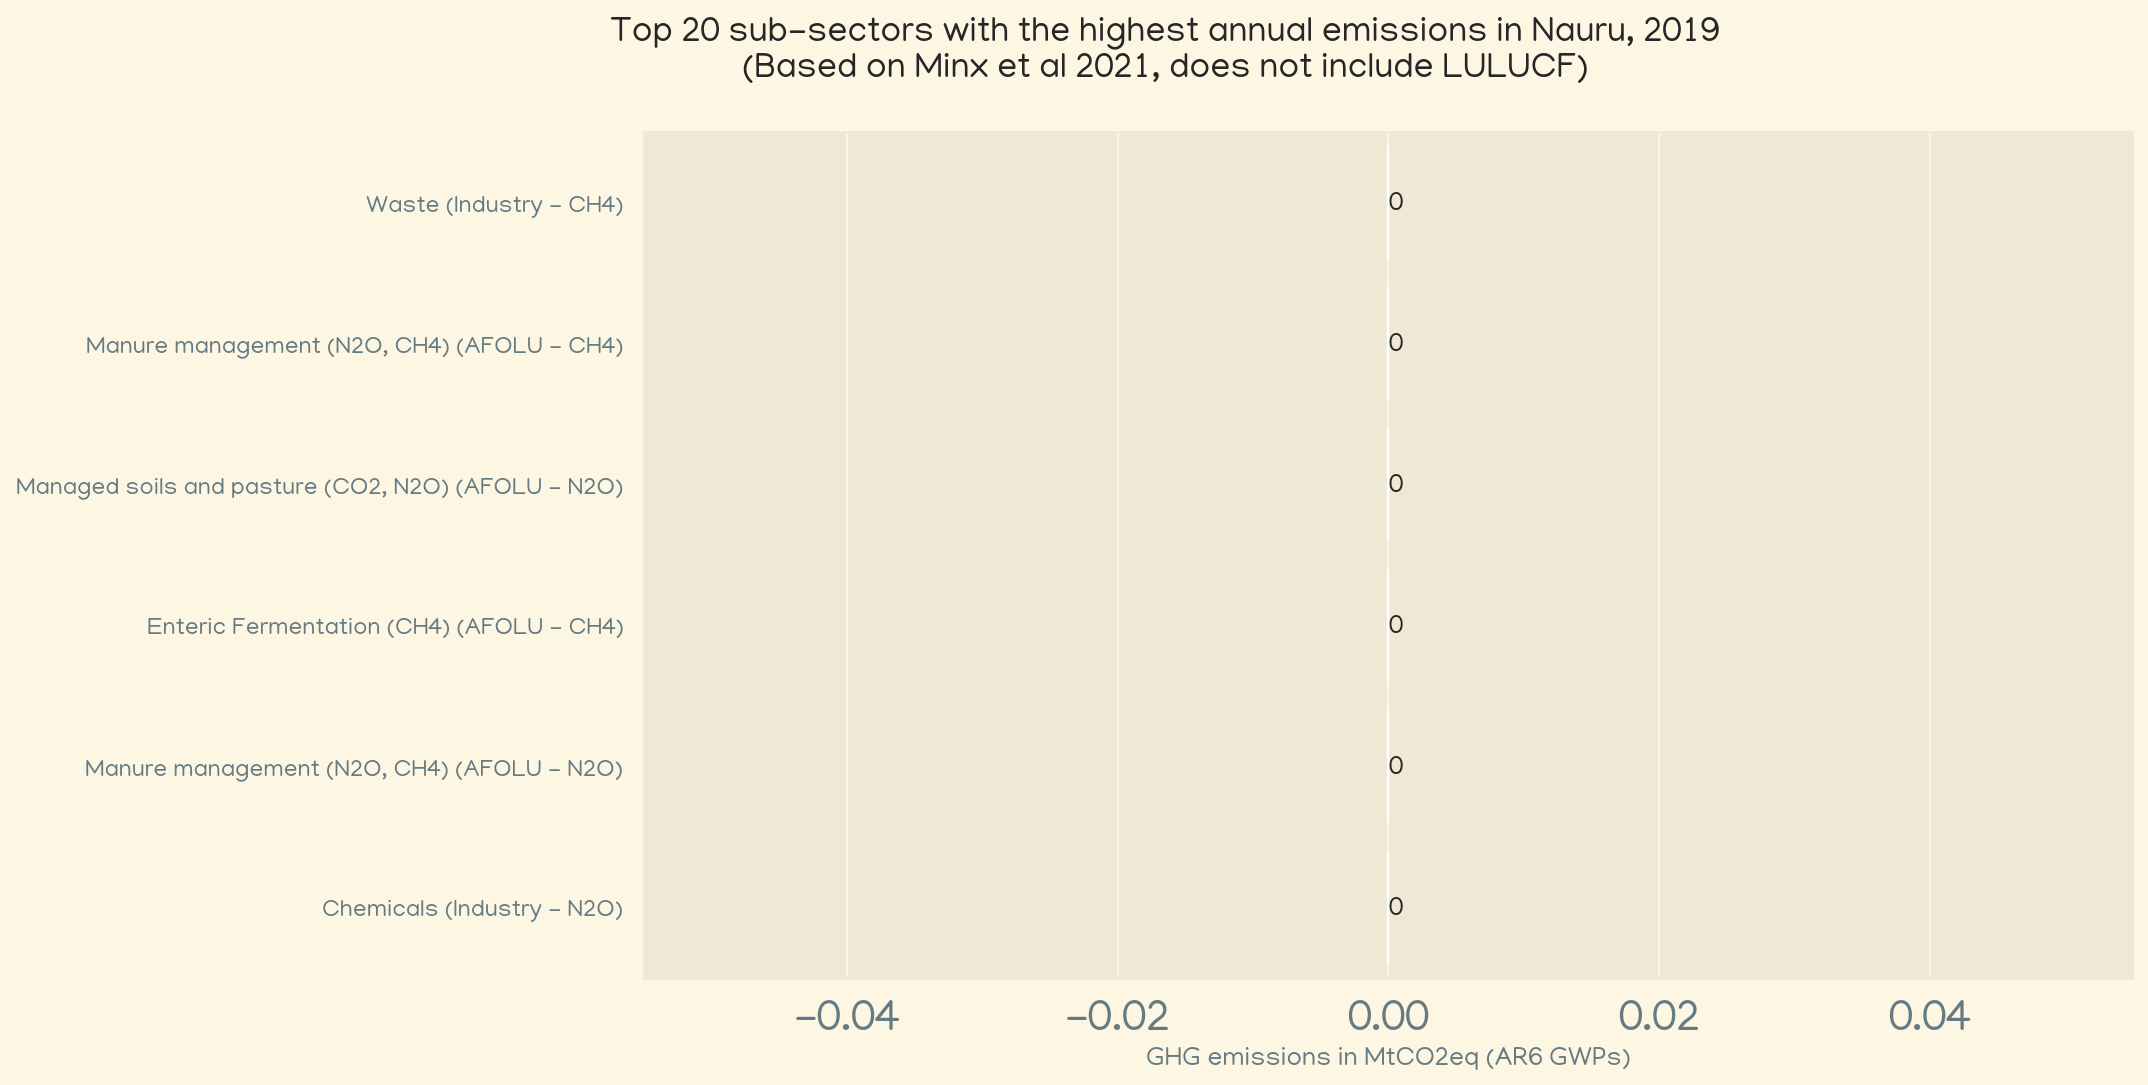

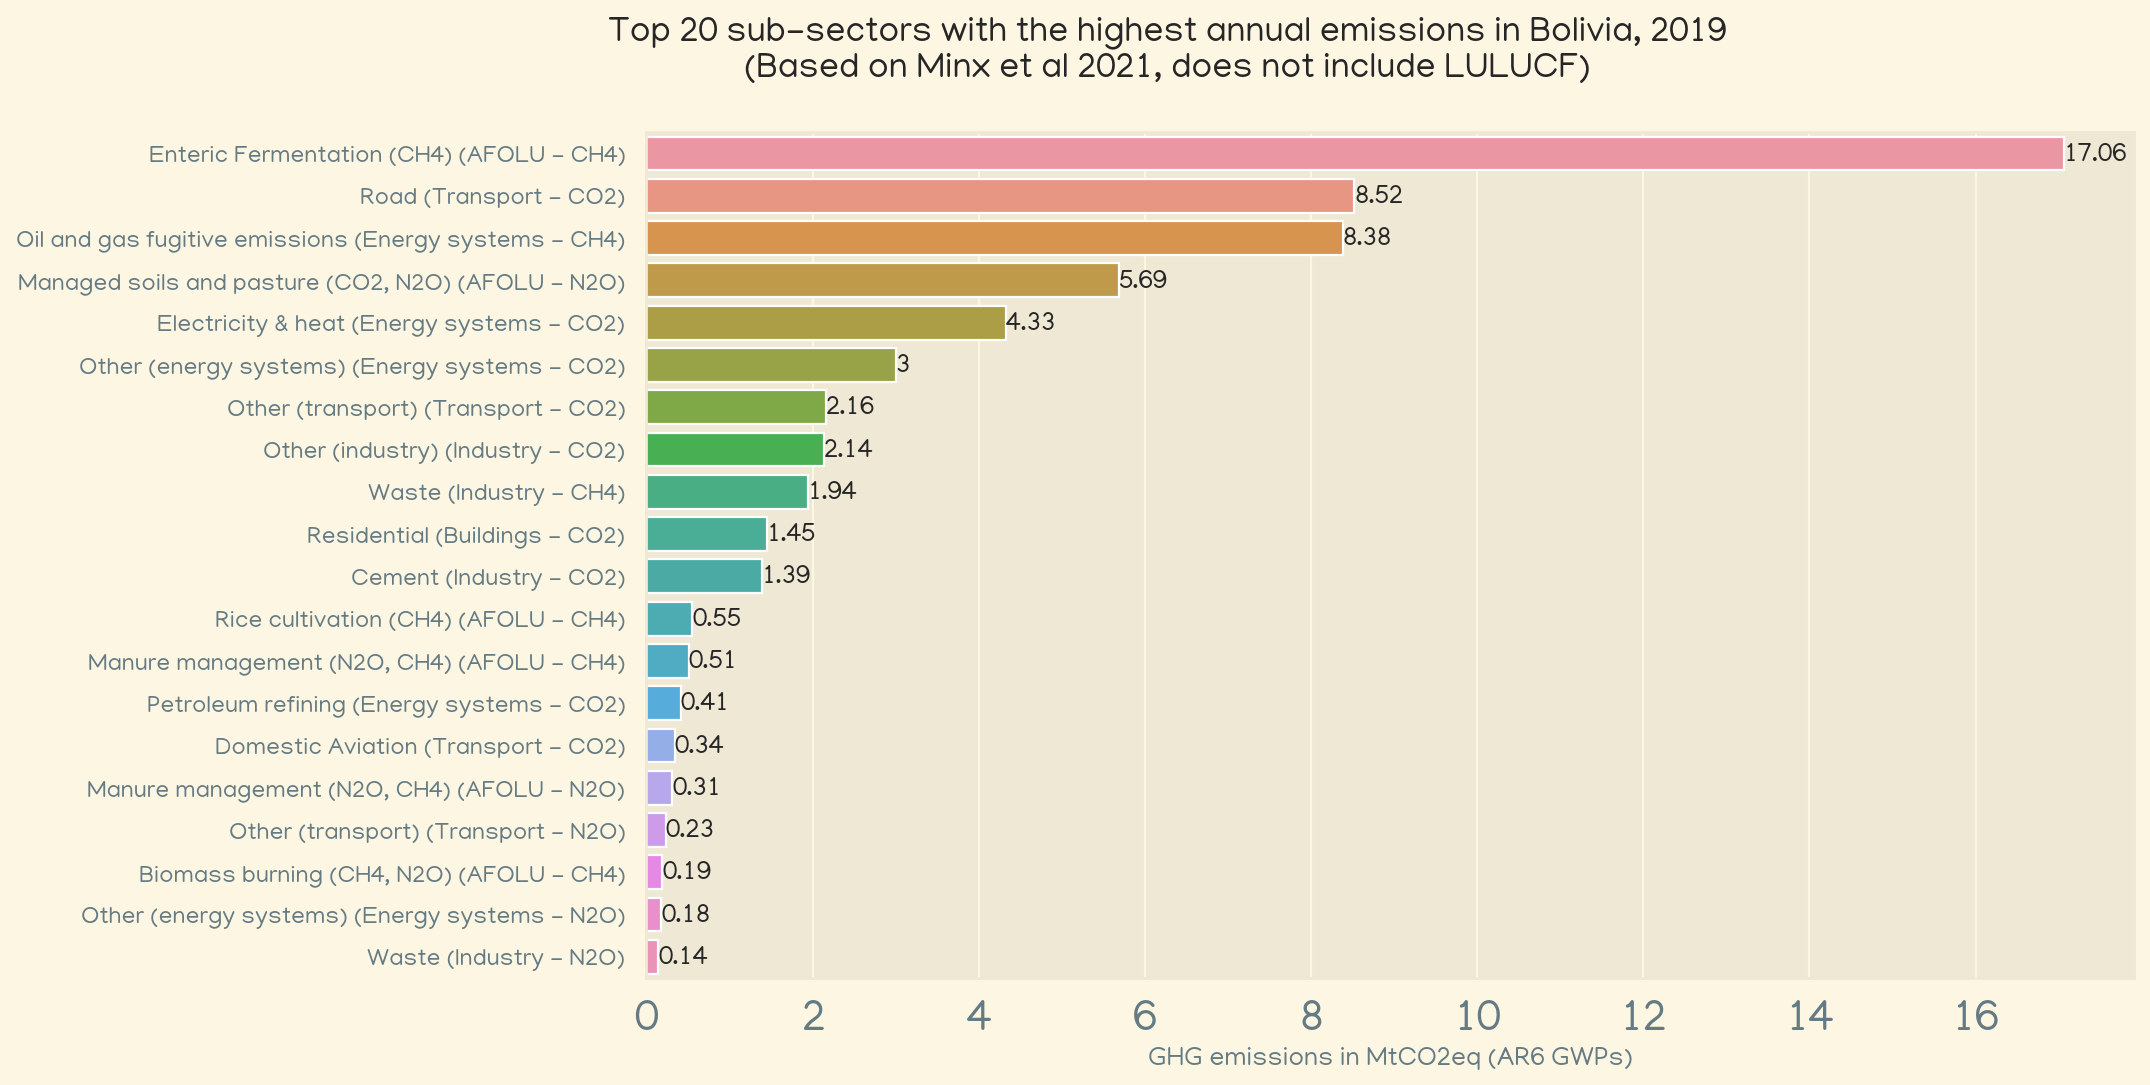

In [30]:
df_minx = df_minx[df_minx.code.notna()].reset_index().drop("index", axis=1)


def plot_minx1(code, close=False):
    year = 2019
    df = df_minx.loc[df_minx.year==year]
    df = df.groupby(["name", "code", "region_ar6_22","year","sector_title", "subsector_title","gas"]).sum().reset_index()
    df = df[df.code.str.contains(code)]
    df = df.drop(["gwp100_ar5","gwp100_ar6","value_native","value_ar5"], axis=1)
    df = df.sort_values("value_ar6", ascending=False)
    df = df.reset_index().drop("index",axis=1)
    df = df.iloc[:20,:]
    # display(df)
    
    # ------------------------------------------------------------
    
    fig, axs = plt.subplots(figsize=(12,7))
    
    sns.barplot(data = df, y = df.index, x=(df.value_ar6/1000000).round(2),orient="h")
    axs.bar_label(axs.containers[0])
    
    axs.set_title(f"Top 20 sub-sectors with the highest annual emissions in {df.name.unique()[0]}, {year}\n(Based on Minx et al 2021, does not include LULUCF)",
                  y=1.05,x=.35)
    axs.set_yticks(range(len(df)))
    axs.set_yticklabels(df.subsector_title + " (" + df.sector_title + " - " + df.gas + ")")
    axs.set_xlabel("GHG emissions in MtCO2eq (AR6 GWPs)")
    axs.tick_params(axis="x", labelsize=20)
    
    fig_country_saver(fig, code, file_ending_and_type="Minx_top20_subsectors")
    
    
    if close == True:
        plt.close()

# ------------------------------------------------------------

plot_minx1(random.choice(df_minx.code.unique()))
plot_minx1("BOL")

In [32]:
# list_minx = df_minx.groupby("code").count().index
# for i in range(len(list_minx)):
#     code = list_minx[i]
#     print(code, end="\r")
#     try:
#         plot_minx1(code, close=True)
#     except:
#         display(f"{code} not found")
#         plt.close()
        
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_minx.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_minx1(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

'AIR nop'

'ANT nop'

'ATF nop'

'BVT nop'

'CCK nop'

'CXR nop'

'NFK nop'

'PCN nop'

'SCG nop'

'SEA nop'

'UMI nop'

Finished
pages updated
Global & country READMES updated
Homepage updated


# UNFCCC Annex I

In [33]:
df_unfccc_ai

,code,name,Parent Category,Category,Gas,Unit,GWP_AR4_conditional,GWP_AR6_conditional,Base year,1990,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AUS,Australia,1. Energy,1.A.1 Energy Industries,Aggregate GHGs,MtCO2eq,1,1,143.211000,143.211000,...,226.660000,220.712000,222.471000,211.473000,205.297000,212.042000,219.422000,218.428000,214.601000,213.814000
1,AUS,Australia,1. Energy,1.A.1 Energy Industries,CH4,MtCO2eq,25,25,0.152966,0.152966,...,0.582400,0.451877,0.545782,0.515282,0.647907,0.727285,0.916665,0.860737,0.952913,0.887035
2,AUS,Australia,1. Energy,1.A.1 Energy Industries,CO2,MtCO2eq,1,1,142.551000,142.551000,...,224.948000,219.013000,220.698000,209.739000,203.485000,210.371000,217.548000,216.606000,212.752000,212.031000
3,AUS,Australia,1. Energy,1.A.1 Energy Industries,N2O,MtCO2eq,298,298,0.506877,0.506877,...,1.128845,1.246874,1.227379,1.219109,1.164060,0.943790,0.958067,0.961715,0.896387,0.896199
4,AUS,Australia,1. Energy,1.A.2 Manufacturing Industries and Construction,Aggregate GHGs,MtCO2eq,1,1,36.256200,36.256200,...,39.742000,40.918900,42.912900,46.012100,46.383400,42.487300,40.968500,40.070500,40.950900,40.792600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58316,USA,United States of America,Totals,Total GHG emissions without LULUCF,NF3,MtCO2eq,17200,17200,0.047922,0.047922,...,0.557691,0.568919,0.572732,0.498578,0.516564,0.566444,0.569480,0.594546,0.616978,0.605124
58317,USA,United States of America,Totals,Total GHG emissions without LULUCF,N2O,MtCO2eq,298,298,452.656040,452.656040,...,454.950640,445.575560,416.764920,463.857860,473.989860,468.244420,450.793540,446.272880,459.212040,457.140940
58318,USA,United States of America,Totals,Total GHG emissions without LULUCF,PFCs,MtCO2eq,1,1,24.255700,24.255700,...,4.737930,7.315630,6.404460,6.122770,5.760310,5.204580,4.390520,4.092780,4.699570,4.484390
58319,USA,United States of America,Totals,Total GHG emissions without LULUCF,SF6,MtCO2eq,22800,22800,28.845648,28.845648,...,7.288636,8.207681,6.921738,6.513755,6.557417,5.490035,6.020796,5.873713,5.694847,5.902920


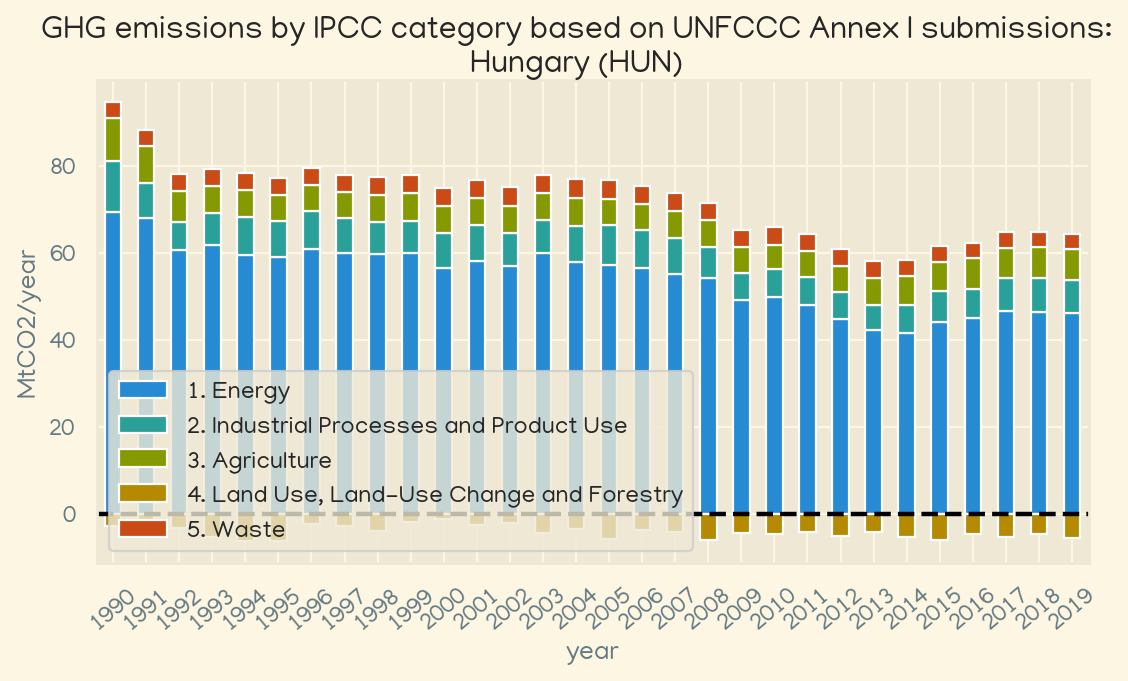

In [34]:
df_unfccc_ai = df_unfccc_ai[df_unfccc_ai.code.notna()].reset_index().drop("index", axis=1)

#------------------------------------------------------------------------------------

def plot_unfccc_ai_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle(f"GHG emissions by IPCC category based on UNFCCC Annex I submissions:\n{STANDARD_COUNTRY_DICT[code]} ({code})")
    
    df = df_unfccc_ai[df_unfccc_ai.code==code]
    df = df[df['Parent Category']=="Totals"]
    df = df[df.Gas=="Aggregate GHGs"]
    # display(df)
    df = df.iloc[:5,:] #choses only 5 ipcc categories, leaves totals out
    df = df.set_index("Category")    
    df = df.loc[:,"1990":].T
    df.index = pd.to_datetime(df.index).year
    
    df.plot(kind="bar", stacked=True, ax=axs)
    axs.axhline(0,color="black", ls="--")
    
    axs.set_ylabel("MtCO2/year")
    axs.set_xlabel("year")
    axs.tick_params("x", rotation=40)

    axs.legend(loc="best")
    
    fig_country_saver(fig, code, "UNFCCC_AI_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_unfccc_ai_totals(random.choice(df_unfccc_ai.code))

In [35]:
# list_unfccc_ai = df_unfccc_ai.groupby("code").count().index
# for i in range(len(list_unfccc_ai)):
#     code = list_unfccc_ai[i]
#     print(code, end="\r")
#     try:
#         plot_unfccc_ai_totals(code, close=True)
#     except:
#         display(f"{code} nop")
#         plt.close()
        
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_unfccc_ai.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_unfccc_ai_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

Finished
pages updated
Global & country READMES updated
Homepage updated


# UNFCCC NON-ANNEX I

/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


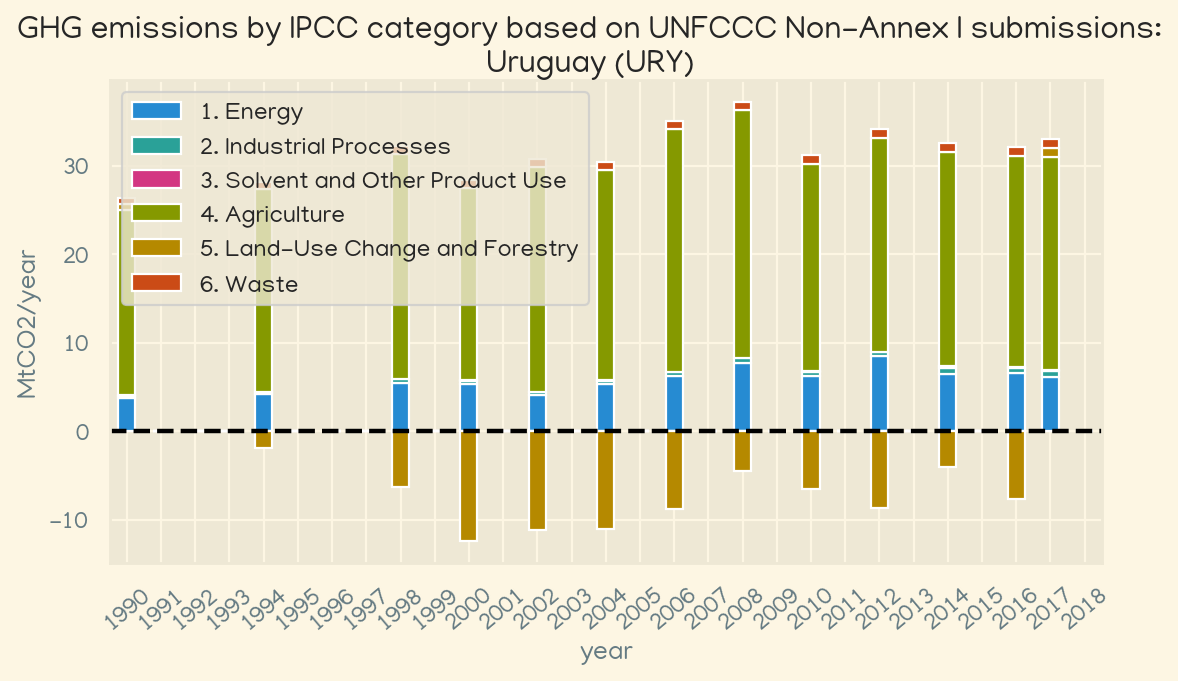

In [36]:
df = df_unfccc_nai
df = df[df['Parent Category']=="Totals"]
df = df[df.Gas=="Aggregate GHGs"]
df = df[-df.Category.isin(["Total GHG emissions excluding LULUCF/LUCF",
                           "Total GHG emissions including LULUCF/LUCF"])]
dfi=df

list_categores = df.Category.unique()
colors = dict(zip(list_categores,plt.rcParams['axes.prop_cycle'].by_key()['color']))

#------------------------------------------------------------------------------------

def plot_unfccc_nai_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (8,4))
    fig.suptitle(f"GHG emissions by IPCC category based on UNFCCC Non-Annex I submissions:\n{STANDARD_COUNTRY_DICT[code]} ({code})")
    
    df=dfi
    df = dfi[dfi.code==code]
    # df = df[df['Parent Category']=="Totals"]
    # df = df[df.Gas=="Aggregate GHGs"]
    # display(df)
    # df = df.iloc[:5,:]
    df = df.set_index("Category")    
    df = df.loc[:,"1990":].T
    df.index = pd.to_datetime(df.index).year.astype(int)
    
    df.plot(kind="bar", stacked=True, ax=axs, 
            color=colors,
            hatch=dict(zip(list_categores,["o","o","o","o","o","o"])))
    axs.axhline(0,color="black", ls="--")
    
    
    axs.set_ylabel("MtCO2/year")
    axs.set_xlabel("year")
    axs.tick_params("x", rotation=40)

    axs.legend(loc="best")
    
    fig_country_saver(fig, code, "UNFCCC_NAI_1")
    
    if close == True:
        plt.close()

#----------------------------------------------------------------------------------

#Random example
import random
plot_unfccc_nai_totals(random.choice(df_unfccc_nai.code))

In [37]:
# list_unfccc_nai = df_unfccc_nai.groupby("code").count().index
# for i in range(len(list_unfccc_nai)):
#     code = list_unfccc_nai[i]
#     print(code, end="\r")
#     try:
#         plot_unfccc_nai_totals(code, close=True)
#     except:
#         display(f"{code} nop")
#         plt.close()
        
# GENERATE AND SAVE FIGS FOR ALL COUNTRIES


list_codes = df_unfccc_nai.groupby("code").count().index #UPDATE THIS

for i, j in enumerate(list_codes):
    code = j
    print(code, end="\r")
    try:
        plot_unfccc_nai_totals(code, close=True) #UPDATE THIS
    except:
        display(f"{code} nop")
        plt.close()
print("Finished")

%run UPDATE.ipynb

/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)
/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)
/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


/home/dquintubux/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1488: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "1. Energy2. Industrial Processes4. Agriculture5. Land-Use Change and Forestry6. Waste7. Other". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


Finished
pages updated
Global & country READMES updated
Homepage updated


# Other Inventories

In [ ]:
df_carbon_mon = pd.read_csv("../clean_data/Carbon-Monitor.csv", index_col=0)
df =df_carbon_mon

for i,j in enumerate(df.name.unique()):
    print(j)
    df_country = df[df.name==j].set_index("date")
    sector_list = df_country.sector.unique()
    
    
    
    fig, axs = plt.subplots(len(sector_list),1,figsize=(12,8))
    axs = axs.flatten()
    plt.suptitle(j, fontsize=28)
    
    for i,j in enumerate(sector_list):
        df_country_sector = df_country[df_country.sector==j]
        # display(df_country)
        df_country.index = pd.to_datetime(df_country.index, format= "%Y/%m/%d")
        
        axs[i].set_title(j)
        axs[i].plot(df_country_sector.value)
        axs[i].set_ylim(0, df_country_sector.value.max()*1.1)
    fig.tight_layout()